# Neural net example

In this notebook we train a simple Neural Net to predict the price-category of a new mobile phone. We use the [`mobile price classification` dataset](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification) for this example. You can download this on kaggle or find it at assembl

In [1]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('mobile-pricing/train.csv') 
dataset.head() 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
X = dataset.iloc[:,:20].values
y = dataset.iloc[:,20:21].values

In [13]:
X.shape

(2000, 20)

In [8]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [9]:
y

array([[1],
       [2],
       [2],
       ...,
       [3],
       [0],
       [3]])

In [10]:
from sklearn.preprocessing import OneHotEncoder
y = OneHotEncoder().fit_transform(y).toarray()

In [11]:
y

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100


2023-06-08 15:10:17.956605: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


29/29 [==============================] - 0s 407us/step - loss: 1.3768 - accuracy: 0.3094
Epoch 2/100
29/29 [==============================] - 0s 439us/step - loss: 1.3027 - accuracy: 0.3656
Epoch 3/100
29/29 [==============================] - 0s 449us/step - loss: 1.2395 - accuracy: 0.4144
Epoch 4/100
29/29 [==============================] - 0s 495us/step - loss: 1.1761 - accuracy: 0.4406
Epoch 5/100
29/29 [==============================] - 0s 419us/step - loss: 1.1085 - accuracy: 0.4872
Epoch 6/100
29/29 [==============================] - 0s 418us/step - loss: 1.0380 - accuracy: 0.5394
Epoch 7/100
29/29 [==============================] - 0s 469us/step - loss: 0.9670 - accuracy: 0.5756
Epoch 8/100
29/29 [==============================] - 0s 458us/step - loss: 0.8994 - accuracy: 0.6094
Epoch 9/100
29/29 [==============================] - 0s 482us/step - loss: 0.8357 - accuracy: 0.6461
Epoch 10/100
29/29 [==============================] - 0s 440us/step - loss: 0.7775 - accuracy: 0.6822
E

29/29 [==============================] - 0s 399us/step - loss: 0.0673 - accuracy: 0.9872
Epoch 82/100
29/29 [==============================] - 0s 419us/step - loss: 0.0669 - accuracy: 0.9867
Epoch 83/100
29/29 [==============================] - 0s 415us/step - loss: 0.0644 - accuracy: 0.9856
Epoch 84/100
29/29 [==============================] - 0s 411us/step - loss: 0.0630 - accuracy: 0.9883
Epoch 85/100
29/29 [==============================] - 0s 401us/step - loss: 0.0621 - accuracy: 0.9889
Epoch 86/100
29/29 [==============================] - 0s 414us/step - loss: 0.0612 - accuracy: 0.9883
Epoch 87/100
29/29 [==============================] - 0s 433us/step - loss: 0.0607 - accuracy: 0.9878
Epoch 88/100
29/29 [==============================] - 0s 401us/step - loss: 0.0590 - accuracy: 0.9878
Epoch 89/100
29/29 [==============================] - 0s 404us/step - loss: 0.0589 - accuracy: 0.9883
Epoch 90/100
29/29 [==============================] - 0s 405us/step - loss: 0.0585 - accuracy: 

In [18]:
y_pred = model.predict(X_test)

7/7 [==============================] - 0s 528us/step


In [19]:
y_pred

array([[2.37998449e-07, 9.12192702e-01, 8.78070369e-02, 3.58132688e-08],
       [9.69116449e-01, 3.08835469e-02, 3.52804157e-13, 4.47153624e-22],
       [6.26012770e-05, 9.99839187e-01, 9.82598212e-05, 1.12156513e-10],
       [3.45289521e-25, 9.50545476e-11, 9.68631066e-05, 9.99903083e-01],
       [3.06188226e-01, 6.93811834e-01, 3.03463366e-11, 2.26438754e-20],
       [9.99978900e-01, 2.11177194e-05, 2.76471434e-26, 0.00000000e+00],
       [1.34995997e-21, 5.60616664e-09, 2.37885909e-03, 9.97621119e-01],
       [1.99403978e-30, 3.76655350e-15, 1.18462431e-08, 1.00000000e+00],
       [7.60888215e-04, 9.99236345e-01, 2.76126707e-06, 8.53373565e-14],
       [5.05538454e-25, 7.86097489e-12, 9.22294294e-06, 9.99990821e-01],
       [1.23533788e-29, 1.07502223e-13, 1.70676424e-06, 9.99998331e-01],
       [2.59114065e-23, 2.96101454e-09, 7.89713580e-04, 9.99210238e-01],
       [2.67105731e-28, 8.58699288e-13, 1.96088149e-06, 9.99998093e-01],
       [1.02937686e-14, 4.59001749e-05, 9.99869943e

In [21]:
#Converting predictions to label
pred = np.argmax(y_pred, axis=1)
test = np.argmax(y_test, axis=1)

In [23]:
pred.shape

(200,)

In [25]:
from sklearn.metrics import accuracy_score

a = accuracy_score(pred, test)
print(f'Accuracy is: {a*100}')

Accuracy is: 92.5


In [26]:
history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
29/29 [==============================] - 0s 5ms/step - loss: 0.0499 - accuracy: 0.9906 - val_loss: 0.1778 - val_accuracy: 0.9200
Epoch 2/100
29/29 [==============================] - 0s 759us/step - loss: 0.0478 - accuracy: 0.9906 - val_loss: 0.1776 - val_accuracy: 0.9200
Epoch 3/100
29/29 [==============================] - 0s 810us/step - loss: 0.0476 - accuracy: 0.9917 - val_loss: 0.1783 - val_accuracy: 0.9200
Epoch 4/100
29/29 [==============================] - 0s 814us/step - loss: 0.0482 - accuracy: 0.9922 - val_loss: 0.1819 - val_accuracy: 0.9150
Epoch 5/100
29/29 [==============================] - 0s 854us/step - loss: 0.0474 - accuracy: 0.9906 - val_loss: 0.1777 - val_accuracy: 0.9200
Epoch 6/100
29/29 [==============================] - 0s 821us/step - loss: 0.0451 - accuracy: 0.9928 - val_loss: 0.1783 - val_accuracy: 0.9150
Epoch 7/100
29/29 [==============================] - 0s 823us/step - loss: 0.0446 - accuracy: 0.9928 - val_loss: 0.1809 - val_accuracy: 0.9150
E

Epoch 58/100
29/29 [==============================] - 0s 783us/step - loss: 0.0202 - accuracy: 0.9994 - val_loss: 0.2131 - val_accuracy: 0.9200
Epoch 59/100
29/29 [==============================] - 0s 805us/step - loss: 0.0199 - accuracy: 0.9994 - val_loss: 0.2150 - val_accuracy: 0.9050
Epoch 60/100
29/29 [==============================] - 0s 767us/step - loss: 0.0198 - accuracy: 0.9994 - val_loss: 0.2111 - val_accuracy: 0.9150
Epoch 61/100
29/29 [==============================] - 0s 826us/step - loss: 0.0200 - accuracy: 0.9994 - val_loss: 0.2109 - val_accuracy: 0.9100
Epoch 62/100
29/29 [==============================] - 0s 920us/step - loss: 0.0192 - accuracy: 0.9994 - val_loss: 0.2159 - val_accuracy: 0.9100
Epoch 63/100
29/29 [==============================] - 0s 794us/step - loss: 0.0190 - accuracy: 0.9994 - val_loss: 0.2166 - val_accuracy: 0.9100
Epoch 64/100
29/29 [==============================] - 0s 794us/step - loss: 0.0189 - accuracy: 0.9994 - val_loss: 0.2219 - val_accuracy:

In [27]:
history

In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

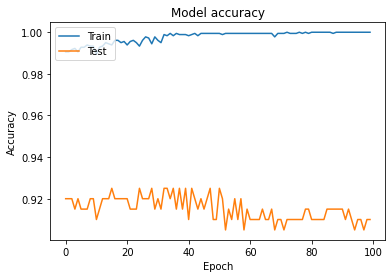

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

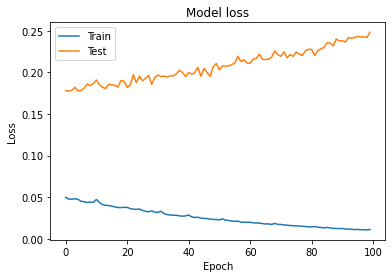

In [32]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()